# Data Wrangling Project 
`Note from the project instruction` 
#### Key Points

- You **only want original ratings (no retweets) that have images**. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.


- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and **clean at least 8 quality issues and at least 2 tidiness issues** in this dataset.


- **Cleaning includes merging individual pieces of data** according to the rules of tidy data.


- The fact that the rating numerators are greater than the denominators **does not need to be cleaned**. This unique rating system is a big part of the popularity of WeRateDogs.


- You **do not need to gather the tweets beyond August 1st, 2017**. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gather

In [1]:
import pandas as pd
import numpy as np

**File #1**
- df_1 - WeRateDogs Twitter data

In [2]:
# df_1 - WeRateDogs Twitter data
# extracted rating from TEXT column
# Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356)
# The ratings probably aren't all correct.

WeRateDogs = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')
df_1 = WeRateDogs.copy()

**File #2**
- df_2 - The tweet image predictions

In [3]:
# df_2 - The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
# file download and save to the folder

import requests

req = requests.get(url)  # requests.get('https://api.github.com/ user', auth=('user', 'pass')) 
url_content = req.content
tsv_file = open('image-predictions.tsv', 'wb')  # Create tsv file and open it as Write Binary mode
tsv_file.write(url_content)                     # Write the contents into tsv file
tsv_file.close()                                # Close file

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t')  # separate tsv format as tab
df_2 = image_predictions.copy()

**File #3**
- Used Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include **retweet count and favorite count**.

`Note from the project instruction` 

According to the project requirement - 'Do not include your Twitter API keys, secrets, and tokens in your project submission', **added '#' tags to the entire following line after completely gathered data.**

In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = '????????????????????'
# consumer_secret = '????????????????????'
# access_token = '????????????????????'
# access_secret = '????????????????????'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)  # Create an API object to gather Twitter data

# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0          
# fails_dict = {} 
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:     # Open a new text file as write mode
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)    # Make available to save JSON object in 'tweet_json.txt'
#             outfile.write('\n')                # A line of JSON object is stored in 'tweet_json.txt'
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# List of dictionaries to read tweet's JSON data line by line and later convert to DataFrame

import json    # json.loads() method is used to parse(*below)

df_list = []

with open('tweet_json.txt', 'r') as outfile:
    
    for line in outfile:
        status = json.loads(line)  # Convert JSON object into Python Dictionary
        
        # Parse the Python Dictionary and append to list 
        
        df_list.append({'tweet_id': status['id'],
                       'retweet_count': status['retweet_count'],
                       'favorite_count': status['favorite_count']})
        
# Convert list into DataFrame        
        
tweety = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])
df_3 = tweety.copy()

*json.loads() method can be used to parse a valid JSON string and convert it into a Python Dictionary. It is mainly used for deserializing native string, byte, or byte array which consists of JSON data into Python Dictionary.

## Assess

`Note from the 'Project Motivation'` 

"I extracted this data programmatically, but I didn't do a very good job. **The ratings probably aren't all correct.** Same goes for the **dog names** and probably **dog stages** (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization."

### df_1

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
sum(df_1.text.duplicated())

0

In [12]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Bailey         7
Toby           7
Daisy          7
Milo           6
Jax            6
Bella          6
Oscar          6
Jack           6
Koda           6
Rusty          6
Leo            6
Dave           6
Stanley        6
Scout          6
Oakley         5
            ... 
Pherb          1
Amber          1
Tango          1
Crouton        1
Schnitzel      1
Simba          1
Mabel          1
Robin          1
Mutt           1
Brady          1
Ruffles        1
Donny          1
Shelby         1
Chloe          1
Dook           1
Iroh           1
Mason          1
Alfy           1
Maxwell        1
Ester          1
Edmund         1
Binky          1
Huxley         1
Grady          1
Molly          1
Freddery       1
Rodman         1
Bert          

In [13]:
list(df_1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [14]:
sum(df_1.tweet_id.value_counts() != 1)

0

In [15]:
sum(df_1.tweet_id.duplicated())

0

In [16]:
sum(df_1.timestamp.duplicated())

0

In [17]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Bailey         7
Toby           7
Daisy          7
Milo           6
Jax            6
Bella          6
Oscar          6
Jack           6
Koda           6
Rusty          6
Leo            6
Dave           6
Stanley        6
Scout          6
Oakley         5
            ... 
Pherb          1
Amber          1
Tango          1
Crouton        1
Schnitzel      1
Simba          1
Mabel          1
Robin          1
Mutt           1
Brady          1
Ruffles        1
Donny          1
Shelby         1
Chloe          1
Dook           1
Iroh           1
Mason          1
Alfy           1
Maxwell        1
Ester          1
Edmund         1
Binky          1
Huxley         1
Grady          1
Molly          1
Freddery       1
Rodman         1
Bert          

In [19]:
df_1[df_1.name == 'None'].text.head()

5     Here we have a majestic great white breaching ...
7     When you watch your owner call another dog a g...
12    Here's a puppo that seems to be on the fence a...
24    You may not have known you needed to see this ...
25    This... is a Jubilant Antarctic House Bear. We...
Name: text, dtype: object

In [20]:
df_1.iloc[2330] 

tweet_id                                                     666362758909284353
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 21:10:36 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Unique dog here. Very small. Lives in containe...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666362758...
rating_numerator                                                              6
rating_denominator                                                           10
name                                    

In [21]:
df_1[df_1.rating_denominator != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [22]:
sum(df_1.rating_denominator != 10)

23

> There are 23 lines in which rating_denominator are not '10'

In [23]:
# Check lines having multiple dog stages
df_stage = df_1.copy()

In [24]:
df_stage.doggo.replace('None', np.NaN, inplace = True)
df_stage.floofer.replace('None', np.NaN, inplace = True)
df_stage.pupper.replace('None', np.NaN, inplace = True)
df_stage.puppo.replace('None', np.NaN, inplace = True)

In [25]:
df_stage['doggo_dmy'] = pd.get_dummies(df_stage['doggo'])
df_stage['floofer_dmy'] = pd.get_dummies(df_stage['floofer'])
df_stage['pupper_dmy'] = pd.get_dummies(df_stage['pupper'])
df_stage['puppo_dmy'] = pd.get_dummies(df_stage['puppo'])

In [26]:
df_stage['dmy_sum'] = df_stage.doggo_dmy + df_stage.floofer_dmy + df_stage.pupper_dmy + df_stage.puppo_dmy

In [27]:
df_stage.dmy_sum.value_counts()

0    1976
1     366
2      14
Name: dmy_sum, dtype: int64

> There are 14 lines having multiple dog stages

### df_2

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
sum(df_2.tweet_id.duplicated())

0

In [31]:
sum(df_2.jpg_url.isnull())

0

In [32]:
sum(df_2.jpg_url.duplicated())

66

> There are 66 lines having duplicated 'jpg_url'

In [33]:
df_2[df_2.jpg_url == 'https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False


### df_3

In [34]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7215,34618
1,892177421306343426,5413,30002
2,891815181378084864,3576,22588
3,891689557279858688,7436,37872
4,891327558926688256,7978,36163


In [35]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null int64
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [36]:
sum(df_3.tweet_id.duplicated())

0

In [37]:
df_3.retweet_count.sort_values(ascending=False).tail(5)

109     3
327     2
261     2
1268    2
278     1
Name: retweet_count, dtype: int64

In [38]:
df_3.favorite_count.sort_values(ascending=False).head(5)

1012    148572
396     127215
516     114754
129     111540
1052    109999
Name: favorite_count, dtype: int64

#### Quality - 8 issues at least
##### `df_1 - twitter-archive-enhanced.csv` table
- Extract **rating** from the original text and match those with data given. Revise incorrect result if any.
- Extract **dog names** from the original text and match those with data given. Revise incorrect result if any.
- Extract **dog stages** from the original text and match those with data given. Revise incorrect result if any.
- Find missing **name** for null from the original text if exist 
- Correct and find **name** starting with lowercase such as 'a', 'an', and 'the'
- Remove rows of **rating_denominator which is not 10** according to the unique rating system
- Remove rows of **rating_numerator which significantly exceed the mean value** to get the optimized analysis result
- Select one for multiple **dog stages**
- Remove unwanted columns after merging DataFrames


##### `df_2 - image-predictions.tsv` table
- Remove duplicated **jpg_url** 
- Unify **P1, P2, P3 name** as lowercase 

#### Tidiness - 2 issues at least
- `df_1 - witter_archive_enhanced.csv1` we find a number of dog type columns such as doggo, pupper, and floofer. These should be combined into a single column to define which stage the dog referenced is currently in.
- Merge DataFrames

## Clean

### Quality

#### `df_1 table` Check if the rating are correctly extracted and added to the table given

##### Define
It's mentioned that the programmatically extracted rating are not probably correct. Extract the rating from the original text and test if new rates are match with the given values. 

##### Code

In [39]:
df_rating = df_1.copy()

df_1['new_rating'] = df_rating.text.str.extract('(\d+/\d+)')
df_1['new_rating_numerator'], df_1['new_rating_denominator'] = df_1.new_rating.str.split('/', 1).str

**Used Regex tester: https://regexr.com/**

In [40]:
df_1.new_rating_numerator = df_1.new_rating_numerator.astype(int)
df_1.new_rating_denominator = df_1.new_rating_denominator.astype(int)
df_1.drop(columns= 'new_rating', inplace = True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
new_rating_numerator          23

##### Test

In [41]:
sum(df_1.rating_numerator != df_1.new_rating_numerator)

0

In [42]:
sum(df_1.rating_denominator != df_1.new_rating_denominator)

0

> Ratings are all correctly extracted.

#### `df_1 table` Check if the **dog names** are correctly extracted and added to the table given
#### `df_1 table` Find missing **name** for null from the original text if exist 
#### `df_1 table` Correct and find **name** starting with lowercase such as 'a', 'an', and 'the'

##### Define
It's mentioned that the programmatically extracted dog names are not probably correct. Extract the rating from the original text and test if new rates are match with the given values. 

##### Code

In [43]:
sum(df_1.name.isnull())

0

In [44]:
df_1.query('name == "None"').tweet_id.count()

745

In [45]:
df_name = df_1.copy()

In [46]:
pd.set_option('max_row', None)

In [47]:
pd.set_option('display.max_colwidth', -1)

In [48]:
df_name.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

**Used Regex tester: https://regexr.com/**

In [49]:
# Extract only Last name
# Extract the last dog name if there are multiple dogs in one tweet

df_name['new_name'] = df_name.text.str.extract(r'([A-Z][a-z]+[\.|\,])') 
df_name.new_name = df_name.new_name.str[:-1]

In [50]:
# Check irregular name

df_name.new_name.value_counts()

Charlie                                                                        14
Oliver                                                                         12
Cooper                                                                         11
Tucker                                                                         10
Lola                                                                           10
Lucy                                                                           10
Penny                                                                          9 
Winston                                                                        9 
Daisy                                                                          8 
Bailey                                                                         7 
Buddy                                                                          7 
Toby                                                                           7 
Bo              

In [51]:
# Check original text for the irregular names

df_name.query('new_name == "Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy"').text

165    RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…
870    Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7    
Name: text, dtype: object

In [52]:
df_name = df_name.replace("Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy", "None")

In [53]:
df_name.query('new_name == "Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_name


In [54]:
# Match original data given - 'name' column with 'new_name' column to additionally find and fix names

sum(df_name.name != df_name.new_name)

948

In [55]:
# Check original text for the unmatched names

df_name[df_name.name != df_name.new_name].text

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh     
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                         
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                     
22      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                   
24      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV                                                       
25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would s

In [56]:
# For suspicious dog names, manually check and fix the names by referring to the original text

df_name = df_name.replace("Pipsy", "Pablo")
df_name = df_name.replace("Cumberdog", "Flávio")
df_name = df_name.replace("Ce", "CeCe")
df_name = df_name.replace("Be", "BeBe")

In [57]:
# manually replace 'None' with the correct name by referring to the original text

df_name.loc[2217, 'new_name'] = "Gòrdón"
df_name.loc[119, 'new_name'] = "Dewey"
df_name.loc[915, 'new_name'] = "Devón"
df_name.loc[2221, 'new_name'] = "DayZ"

In [58]:
# For names which are not a dog name, fill them as null

df_name = df_name.replace(
    [
    "Day"
    "This",
    "Bears",
    "Bear",
    "We",
    "Hilarious",
    "Unbelievable",
    "Jesus",
    "Puppollock",
    "March",
    "Guys",
    "Owl",
    "Improvement",
    "Unbelievable",
    "Occasionally",
    "Did",
    "Today",
    "Well",
    "Seal",
    "Max",
    "Panda",
    "Kangaroo",
    "Guys",
    "Oh",
    "Monday",
    "So",
    "Seaweed",
    "Guys",
    "Kangaroo",
    "Retweet",
    "St",
    "Seriously",
    "Pipsy",
    "Seal",
    "Trump",
    "Funyun",
    "Wubberfloof",
    "Jesus",
    "Floofer",
    "Xbox",
    "Episcopalian",
    "Christmas",
    "Friday",
    "Bulbasaur",
    "Monday",
    "Christmas",
    "Skies",
    "Hazelnuts",
    "Guinea",
    "Amarillo",
    "Marshall",
    "Wow",
    "Obedient",
    "Russia",
    "Pythagoreans",
    "Hufflepuff",
    "Feldspars",
    "Octaviath",
    "Cumberbatch",
    "Pulitzer",
    "Parthenon",
    "Episcopalian",
    "Impressive",
    "Rhododendron",
    "Privileged",
    "News",
    "Morgan",
    "Setter",
    "Hat",
    "Airport",
    "Jersey",
    "Christmas",
    "Lion",
    "Dog",
    "Jesus",
    "Yep",
    "Oatzenjammer",
    "Episcopalian",
    "Thumpelina",
    "Seal",
    "Jupiter",
    "God",
    "Islands",
    "Alfonso",
    "Bulldog",
    "Up",
    "Rat",
    ], np.NaN)

In [59]:
df_name = df_name.replace("None", np.NaN)

In [60]:
df_name[df_name.new_name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_name


In [61]:
df_name.new_name.value_counts()

Charlie           14
Oliver            12
Cooper            11
Lola              10
Tucker            10
Lucy              10
Winston           9 
Penny             9 
Daisy             8 
Bailey            7 
Pablo             7 
Buddy             7 
Toby              7 
Bo                7 
Koda              6 
Scout             6 
Sadie             6 
Dave              6 
Leo               6 
Bella             6 
Milo              6 
Stanley           6 
Rusty             6 
George            5 
Gary              5 
Sophie            5 
Sammy             5 
Larry             5 
Loki              5 
Reggie            5 
Moose             5 
Phil              5 
Oscar             5 
Jax               5 
Gus               5 
Ruby              5 
Alfie             5 
Finn              5 
Louis             5 
Carl              4 
Duke              4 
Gerald            4 
Gizmo             4 
Boomer            4 
Cassie            4 
Clarence          4 
This              4 
Derek        

In [62]:
df_1['new_name'] = df_name.new_name

In [63]:
df_1.new_name.value_counts()  

Charlie           14
Oliver            12
Cooper            11
Lola              10
Tucker            10
Lucy              10
Winston           9 
Penny             9 
Daisy             8 
Bailey            7 
Pablo             7 
Buddy             7 
Toby              7 
Bo                7 
Koda              6 
Scout             6 
Sadie             6 
Dave              6 
Leo               6 
Bella             6 
Milo              6 
Stanley           6 
Rusty             6 
George            5 
Gary              5 
Sophie            5 
Sammy             5 
Larry             5 
Loki              5 
Reggie            5 
Moose             5 
Phil              5 
Oscar             5 
Jax               5 
Gus               5 
Ruby              5 
Alfie             5 
Finn              5 
Louis             5 
Carl              4 
Duke              4 
Gerald            4 
Gizmo             4 
Boomer            4 
Cassie            4 
Clarence          4 
This              4 
Derek        

In [64]:
df_1[df_1.name != df_1.new_name].name

5       None        
7       None        
12      None        
22      such        
24      None        
25      None        
30      None        
32      None        
35      None        
37      None        
41      None        
42      None        
47      None        
55      None        
56      a           
59      None        
62      None        
64      None        
67      Jack        
72      None        
78      None        
83      None        
87      Nugget      
88      None        
89      None        
93      None        
96      None        
99      None        
100     None        
101     None        
103     None        
110     None        
112     None        
113     None        
118     quite       
125     None        
127     None        
130     None        
131     None        
133     None        
137     None        
141     None        
148     None        
149     None        
153     Jersey      
154     None        
155     None        
157     None 

In [65]:
df_1[df_1.name != df_1.new_name].new_name

5       NaN        
7       NaN        
12      NaN        
22      Wiener     
24      NaN        
25      This       
30      NaN        
32      NaN        
35      Howard     
37      NaN        
41      NaN        
42      NaN        
47      NaN        
55      NaN        
56      NaN        
59      NaN        
62      NaN        
64      NaN        
67      Furry      
72      NaN        
78      NaN        
83      NaN        
87      Hank       
88      NaN        
89      NaN        
93      This       
96      NaN        
99      NaN        
100     NaN        
101     NaN        
103     NaN        
110     NaN        
112     NaN        
113     NaN        
118     NaN        
125     NaN        
127     NaN        
130     NaN        
131     NaN        
133     NaN        
137     NaN        
141     NaN        
148     NaN        
149     Pablo      
153     NaN        
154     NaN        
155     NaN        
157     NaN        
160     NaN        
164     NaN        


In [66]:
df_name.new_name.value_counts()  

Charlie           14
Oliver            12
Cooper            11
Lola              10
Tucker            10
Lucy              10
Winston           9 
Penny             9 
Daisy             8 
Bailey            7 
Pablo             7 
Buddy             7 
Toby              7 
Bo                7 
Koda              6 
Scout             6 
Sadie             6 
Dave              6 
Leo               6 
Bella             6 
Milo              6 
Stanley           6 
Rusty             6 
George            5 
Gary              5 
Sophie            5 
Sammy             5 
Larry             5 
Loki              5 
Reggie            5 
Moose             5 
Phil              5 
Oscar             5 
Jax               5 
Gus               5 
Ruby              5 
Alfie             5 
Finn              5 
Louis             5 
Carl              4 
Duke              4 
Gerald            4 
Gizmo             4 
Boomer            4 
Cassie            4 
Clarence          4 
This              4 
Derek        

In [67]:
df_name.new_name.count()

1550

In [68]:
df_1.new_name.count()

1550

In [69]:
df_name[df_name.new_name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_name


In [70]:
df_1[df_1.new_name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_name


##### Test

In [71]:
df_1.new_name.value_counts()

Charlie           14
Oliver            12
Cooper            11
Lola              10
Tucker            10
Lucy              10
Winston           9 
Penny             9 
Daisy             8 
Bailey            7 
Pablo             7 
Buddy             7 
Toby              7 
Bo                7 
Koda              6 
Scout             6 
Sadie             6 
Dave              6 
Leo               6 
Bella             6 
Milo              6 
Stanley           6 
Rusty             6 
George            5 
Gary              5 
Sophie            5 
Sammy             5 
Larry             5 
Loki              5 
Reggie            5 
Moose             5 
Phil              5 
Oscar             5 
Jax               5 
Gus               5 
Ruby              5 
Alfie             5 
Finn              5 
Louis             5 
Carl              4 
Duke              4 
Gerald            4 
Gizmo             4 
Boomer            4 
Cassie            4 
Clarence          4 
This              4 
Derek        

In [72]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
new_rating_numerator          23

In [73]:
sum(df_1.new_name.isnull())

806

In [74]:
sum(df_1['new_name'] == 'None')

0

In [75]:
df_1.new_name.isnull().mean()

0.34210526315789475

> Corrected irregular dog names

> Added missing names 

#### `df_1 table` Check if the **dog stages** are correctly extracted and added to the table given
#### `df_1 table` Select one for multiple **dog stages**

##### Define
It's mentioned that the programmatically extracted dog stages are not probably correct, and some have multiple dog stages. Extract the rating from the original text and test if new rates are match with the given values. 

##### Code

In [76]:
df_stage = df_1.copy()

In [77]:
# did not used 'extractall' for uniformity
# extract the first stage in the text
# extract the stage for the first dog if there are multiple dogs in one tweet

add_stage = df_stage.text.str.extract(r'(?P<new_doggo>[Dd][Oo][Gg][Gg][Oo])|(?P<new_floofer>[Ff][Ll][Oo][Oo][Ff][Ee][Rr])|(?P<new_pupper>[Pp][Uu][Pp][Pp][Ee][Rr])|(?P<new_puppo>[Pp][Uu][Pp][Pp][Oo])')
add_stage.sample(5)

,new_doggo,new_floofer,new_pupper,new_puppo
492,NaN,NaN,NaN,NaN
2099,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN
2031,NaN,NaN,NaN,NaN
1499,NaN,NaN,NaN,NaN


**Used Regex tester: https://regexr.com/**

In [78]:
print(sum(add_stage.new_doggo == "Doggo"))
print(sum(add_stage.new_floofer == "Floofer"))
print(sum(add_stage.new_pupper == "Pupper"))
print(sum(add_stage.new_puppo == "Puppo"))
print('\n')
print(sum(add_stage.new_doggo == "DOGGO"))
print(sum(add_stage.new_floofer == "FLOOFER"))
print(sum(add_stage.new_pupper == "PUPPER"))
print(sum(add_stage.new_puppo == "PUPPO"))

8
5
8
1


1
0
5
0


In [79]:
add_stage.new_doggo = add_stage.new_doggo.str.lower()
add_stage.new_floofer = add_stage.new_floofer.str.lower()
add_stage.new_pupper = add_stage.new_pupper.str.lower()
add_stage.new_puppo = add_stage.new_puppo.str.lower()

In [80]:
print(sum(add_stage.new_doggo == "Doggo"))
print(sum(add_stage.new_floofer == "Floofer"))
print(sum(add_stage.new_pupper == "Pupper"))
print(sum(add_stage.new_puppo == "Puppo"))
print('\n')
print(sum(add_stage.new_doggo == "DOGGO"))
print(sum(add_stage.new_floofer == "FLOOFER"))
print(sum(add_stage.new_pupper == "PUPPER"))
print(sum(add_stage.new_puppo == "PUPPO"))

0
0
0
0


0
0
0
0


In [81]:
add_stage = add_stage.replace(np.NaN, "None")

In [82]:
add_stage.head()

,new_doggo,new_floofer,new_pupper,new_puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


##### Test

In [83]:
# Check lines having multiple dog stages

multi_stage = add_stage.copy()

DataFrame `multi_stage` will be reused when working on visualization later.

In [84]:
multi_stage.new_doggo.replace('None', np.NaN, inplace = True)
multi_stage.new_floofer.replace('None', np.NaN, inplace = True)
multi_stage.new_pupper.replace('None', np.NaN, inplace = True)
multi_stage.new_puppo.replace('None', np.NaN, inplace = True)

In [85]:
multi_stage['doggo_dmy'] = pd.get_dummies(multi_stage['new_doggo'])
multi_stage['floofer_dmy'] = pd.get_dummies(multi_stage['new_floofer'])
multi_stage['pupper_dmy'] = pd.get_dummies(multi_stage['new_pupper'])
multi_stage['puppo_dmy'] = pd.get_dummies(multi_stage['new_puppo'])

In [86]:
multi_stage['dmy_sum'] = multi_stage.doggo_dmy + multi_stage.floofer_dmy + multi_stage.pupper_dmy + multi_stage.puppo_dmy

In [87]:
multi_stage.dmy_sum.value_counts()

0    1933
1    423 
Name: dmy_sum, dtype: int64

> There is no lines having multiple dog stages

### Tidiness

- In `df_1 (witter_archive_enhanced.csv)` we find a number of dog type columns such as doggo, pupper, and floofer. These should be combined into a single column to define which stage the dog referenced is currently in.

##### Define
DataFrame `add_stage` Aggregate each stage into a new column - stage, and extract words regarding dog stages

##### Code

In [88]:
add_stage.head(1)

,new_doggo,new_floofer,new_pupper,new_puppo
0,None,None,None,None


In [89]:
add_stage['stage'] = add_stage[['new_doggo', 'new_floofer', 'new_pupper', 'new_puppo']].agg(''.join, axis = 1)

In [90]:
add_stage.head(1)

,new_doggo,new_floofer,new_pupper,new_puppo,stage
0,None,None,None,None,NoneNoneNoneNone


In [91]:
add_stage.stage = add_stage.stage.str.extract(r'(doggo|floofer|pupper|puppo)')
add_stage.stage.fillna("No_info", inplace = True)

##### Test

In [92]:
add_stage.sample(10)

,new_doggo,new_floofer,new_pupper,new_puppo,stage
1719,None,None,None,None,No_info
162,None,None,None,None,No_info
1612,None,None,None,None,No_info
984,None,floofer,None,None,floofer
1739,None,None,None,None,No_info
2135,None,None,None,None,No_info
118,None,None,None,None,No_info
793,None,None,pupper,None,pupper
68,None,None,None,None,No_info
994,None,None,None,None,No_info


In [93]:
add_stage = add_stage.drop(columns = ['new_doggo', 'new_floofer', 'new_pupper', 'new_puppo'])

In [94]:
add_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
stage    2356 non-null object
dtypes: object(1)
memory usage: 18.5+ KB


In [95]:
# conbine 'add_stage' DataFrame and compare it with the original DataFrame columns, and test

df_1 = pd.concat([df_1, add_stage], axis = 1)

In [96]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
new_rating_numerator          23

> Added missing stages

> Correct and cleaned dog stages

> Selected one for multiple dog stages


#### `df_1 table` Remove rows of **rating_denominator which is not 10** according to the unique rating system

##### Define
Remove rows having rating_denominator more than 10 to proceed analysis and visualization as per the denominator standard value, and save this DataFrame as **df_1_all_denominator**

##### Code

In [97]:
# save and backup the original df_1 DataFrame as df_1_all_denominator
df_1_all_denominator = df_1.copy()

In [98]:
sum(df_1.new_rating_denominator != 10)

23

> There are 23 lines that belong to the definition.

In [99]:
idx = df_1[df_1.new_rating_denominator != 10].index

In [100]:
idx

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

In [101]:
df_1.drop(idx, axis = 0, inplace = True)

In [102]:
df_1[df_1.new_rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator,new_name,stage


##### Test

In [103]:
df_1_all_denominator.tweet_id.count()

2356

In [104]:
df_1_all_denominator.new_rating_denominator.count()

2356

In [105]:
df_1.new_rating_denominator.count()

2333

#### `df_1 table` Remove rows of **rating_numerator which significantly exceed the mean value** to get the optimized analysis result

##### Define
Find the mean and check value_counts. Remove irregular lines which exceed 99.65% percentile

##### Code

In [106]:
df_1.new_rating_numerator.describe()

count    2333.000000
mean     12.237462  
std      41.022472  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: new_rating_numerator, dtype: float64

In [107]:
remove = np.percentile(df_1.new_rating_numerator, 99.65)
remove

24.542000000001735

In [108]:
df_1.new_rating_numerator.value_counts() 

12      558
11      463
10      461
13      351
9       156
8       102
14      54 
7       54 
5       37 
6       32 
3       19 
4       15 
2       9  
1       8  
75      2  
0       2  
420     2  
15      2  
26      1  
182     1  
27      1  
1776    1  
17      1  
666     1  
Name: new_rating_numerator, dtype: int64

In [109]:
# find and remove rating_numerator which is '75','182','420','1776'

idx = df_1[df_1.new_rating_numerator > remove].index
df_1 = df_1.drop(index = idx)

##### Test

In [110]:
df_1.new_rating_numerator.value_counts() 

12    558
11    463
10    461
13    351
9     156
8     102
7     54 
14    54 
5     37 
6     32 
3     19 
4     15 
2     9  
1     8  
0     2  
15    2  
17    1  
Name: new_rating_numerator, dtype: int64

#### `df_2 table` Remove duplicated jpg_url 

##### Define
Re-access duplicated lines and have them removed from the DataFrame

##### Code

In [111]:
sum(df_2.tweet_id.duplicated())

0

In [112]:
sum(df_2.jpg_url.duplicated())

66

In [113]:
df_2[df_2.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [114]:
df_2[df_2.jpg_url == 'https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False


In [115]:
idx = df_2[df_2.jpg_url.duplicated()].index
idx

Int64Index([1297, 1315, 1333, 1345, 1349, 1364, 1368, 1387, 1407, 1417, 1427,
            1446, 1453, 1456, 1463, 1476, 1487, 1495, 1510, 1522, 1538, 1541,
            1564, 1569, 1571, 1579, 1588, 1589, 1590, 1591, 1592, 1593, 1594,
            1601, 1605, 1615, 1619, 1624, 1627, 1634, 1636, 1640, 1645, 1652,
            1683, 1693, 1699, 1703, 1712, 1717, 1718, 1727, 1736, 1742, 1746,
            1755, 1789, 1803, 1804, 1858, 1864, 1903, 1944, 1992, 2041, 2055],
           dtype='int64')

In [116]:
df_2.tweet_id.count()

2075

In [117]:
df_2.drop(index = idx, axis = 1, inplace = True)

##### Test

In [118]:
df_2.tweet_id.count()

2009

> Removed 66 duplicated jpg_url lines

#### `df_2 table` Unify **P1 name** as lowercase
#### `df_2 table` Unify **P2 name** as lowercase
#### `df_2 table` Unify **P3 name** as lowercase

##### Define
change all predicted names as lowercase for uniformity

##### Code

In [119]:
df_2.p1 = df_2.p1.str.lower()
df_2.p2 = df_2.p2.str.lower()
df_2.p3 = df_2.p3.str.lower()

##### Test

In [120]:
sum(df_2.p1.str.isupper())   # check uppercase

0

In [121]:
sum(df_2.p2.str.isupper()) 

0

In [122]:
sum(df_2.p3.str.isupper()) 

0

> No uppercase name

In [123]:
df_3.retweet_count.sort_values()

278     1    
1268    2    
261     2    
327     2    
109     3    
29      3    
1053    6    
54      8    
410     9    
63      9    
2311    11   
2270    13   
1496    15   
177     15   
172     16   
2291    19   
202     19   
2161    20   
392     22   
179     22   
1210    25   
592     26   
2232    26   
940     28   
2231    29   
2196    29   
861     30   
2299    30   
272     31   
2309    32   
331     34   
2182    36   
2323    37   
2075    37   
317     38   
2325    38   
186     39   
2297    39   
2271    40   
2314    40   
2292    41   
2326    41   
2287    43   
2293    44   
2273    44   
2272    46   
1867    46   
2227    46   
2132    47   
2318    49   
2213    49   
2115    49   
2185    49   
2259    50   
833     51   
2322    51   
2252    51   
2316    52   
2164    53   
2118    53   
2246    55   
2264    55   
2312    56   
2222    56   
2307    57   
2236    59   
2097    59   
2120    60   
2285    60   
2303    62   
2188    63   
2163  

In [124]:
df_3.favorite_count.sort_values()

458     0     
445     0     
438     0     
436     0     
433     0     
430     0     
429     0     
448     0     
421     0     
417     0     
414     0     
408     0     
405     0     
403     0     
398     0     
418     0     
394     0     
452     0     
462     0     
549     0     
543     0     
540     0     
537     0     
534     0     
528     0     
459     0     
525     0     
520     0     
517     0     
512     0     
504     0     
471     0     
468     0     
523     0     
389     0     
382     0     
380     0     
260     0     
259     0     
253     0     
239     0     
221     0     
220     0     
268     0     
212     0     
195     0     
186     0     
185     0     
173     0     
164     0     
158     0     
202     0     
272     0     
273     0     
276     0     
369     0     
350     0     
344     0     
342     0     
328     0     
326     0     
325     0     
317     0     
312     0     
304     0     
295     0     
294     0 

##### Additional cleaning

In [125]:
df_1 = df_1.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

> Removed columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. 5 columns in total

In [126]:
df_1.expanded_urls = df_1.expanded_urls.fillna("No info")

In [127]:
sum(df_1.expanded_urls.isnull())

0

> Filled null expanded_urls as 'No info'

In [128]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                  2324 non-null int64
timestamp                 2324 non-null object
source                    2324 non-null object
text                      2324 non-null object
expanded_urls             2324 non-null object
rating_numerator          2324 non-null int64
rating_denominator        2324 non-null int64
name                      2324 non-null object
doggo                     2324 non-null object
floofer                   2324 non-null object
pupper                    2324 non-null object
puppo                     2324 non-null object
new_rating_numerator      2324 non-null int64
new_rating_denominator    2324 non-null int64
new_name                  1539 non-null object
stage                     2324 non-null object
dtypes: int64(5), object(11)
memory usage: 308.7+ KB


### Tidiness

###### Combine each DataFrame `df_1` `df_2` `df_3`

In [129]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                  2324 non-null int64
timestamp                 2324 non-null object
source                    2324 non-null object
text                      2324 non-null object
expanded_urls             2324 non-null object
rating_numerator          2324 non-null int64
rating_denominator        2324 non-null int64
name                      2324 non-null object
doggo                     2324 non-null object
floofer                   2324 non-null object
pupper                    2324 non-null object
puppo                     2324 non-null object
new_rating_numerator      2324 non-null int64
new_rating_denominator    2324 non-null int64
new_name                  1539 non-null object
stage                     2324 non-null object
dtypes: int64(5), object(11)
memory usage: 308.7+ KB


In [130]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [131]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null int64
retweet_count     2328 non-null int64
favorite_count    2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [132]:
df = pd.merge(df_1, df_2, how = 'left', on = 'tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 27 columns):
tweet_id                  2324 non-null int64
timestamp                 2324 non-null object
source                    2324 non-null object
text                      2324 non-null object
expanded_urls             2324 non-null object
rating_numerator          2324 non-null int64
rating_denominator        2324 non-null int64
name                      2324 non-null object
doggo                     2324 non-null object
floofer                   2324 non-null object
pupper                    2324 non-null object
puppo                     2324 non-null object
new_rating_numerator      2324 non-null int64
new_rating_denominator    2324 non-null int64
new_name                  1539 non-null object
stage                     2324 non-null object
jpg_url                   1986 non-null object
img_num                   1986 non-null float64
p1                        1986 non-null object
p1_c

In [133]:
df = pd.merge(df, df_3, how = 'left', on = 'tweet_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 29 columns):
tweet_id                  2324 non-null int64
timestamp                 2324 non-null object
source                    2324 non-null object
text                      2324 non-null object
expanded_urls             2324 non-null object
rating_numerator          2324 non-null int64
rating_denominator        2324 non-null int64
name                      2324 non-null object
doggo                     2324 non-null object
floofer                   2324 non-null object
pupper                    2324 non-null object
puppo                     2324 non-null object
new_rating_numerator      2324 non-null int64
new_rating_denominator    2324 non-null int64
new_name                  1539 non-null object
stage                     2324 non-null object
jpg_url                   1986 non-null object
img_num                   1986 non-null float64
p1                        1986 non-null object
p1_c

######  Drop null values from the combine DataFrame

In [134]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 2294
Data columns (total 29 columns):
tweet_id                  1373 non-null int64
timestamp                 1373 non-null object
source                    1373 non-null object
text                      1373 non-null object
expanded_urls             1373 non-null object
rating_numerator          1373 non-null int64
rating_denominator        1373 non-null int64
name                      1373 non-null object
doggo                     1373 non-null object
floofer                   1373 non-null object
pupper                    1373 non-null object
puppo                     1373 non-null object
new_rating_numerator      1373 non-null int64
new_rating_denominator    1373 non-null int64
new_name                  1373 non-null object
stage                     1373 non-null object
jpg_url                   1373 non-null object
img_num                   1373 non-null float64
p1                        1373 non-null object
p1_c

In [135]:
df.retweet_count = df.retweet_count.astype(int)
df.favorite_count = df.favorite_count.astype(int)

`Tip from reviewer:`

Items like extra rows, unwanted columns, and datatype errors do not fall into these categories, and should be considered quality issues.

In [136]:
# Remove unwanted columns
df.drop(columns = ['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'name'], inplace = True)

In [137]:
list(df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'new_rating_numerator',
 'new_rating_denominator',
 'new_name',
 'stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

### Store the clean DataFrame(s) as `twitter_archive_master.csv`.

In [138]:
df.to_csv("twitter_archive_master.csv", index = False)

In [139]:
# Load file for test

df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 22 columns):
tweet_id                  1373 non-null int64
timestamp                 1373 non-null object
source                    1373 non-null object
text                      1373 non-null object
expanded_urls             1373 non-null object
new_rating_numerator      1373 non-null int64
new_rating_denominator    1373 non-null int64
new_name                  1373 non-null object
stage                     1373 non-null object
jpg_url                   1373 non-null object
img_num                   1373 non-null float64
p1                        1373 non-null object
p1_conf                   1373 non-null float64
p1_dog                    1373 non-null bool
p2                        1373 non-null object
p2_conf                   1373 non-null float64
p2_dog                    1373 non-null bool
p3                        1373 non-null object
p3_conf                   1373 non-null float64
p3_

### Store the cleaned data in a SQLite database as well

In [140]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///wrangle_act.db')

#df.to_sql('master', engine, index = False)

Added '#' tag to **df.to_sql('master', engine, index = False)** because Table 'master' already created and exists in the folder.

In [141]:
# Load file from SQL database

df = pd.read_sql('SELECT * FROM master', engine)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 22 columns):
tweet_id                  1373 non-null int64
timestamp                 1373 non-null object
source                    1373 non-null object
text                      1373 non-null object
expanded_urls             1373 non-null object
new_rating_numerator      1373 non-null int64
new_rating_denominator    1373 non-null int64
new_name                  1373 non-null object
stage                     1373 non-null object
jpg_url                   1373 non-null object
img_num                   1373 non-null float64
p1                        1373 non-null object
p1_conf                   1373 non-null float64
p1_dog                    1373 non-null int64
p2                        1373 non-null object
p2_conf                   1373 non-null float64
p2_dog                    1373 non-null int64
p3                        1373 non-null object
p3_conf                   1373 non-null float64
p

`Note from the project instruction` 
## Analyze and visualize at least three (3) insights and one (1) visualization must be produced.

### [*Analyze and visualize #1*]

`Question from insight)` 

**What dog names are most favored and commonly picked up from the Twitter users?**

In [143]:
df['new_name'].value_counts().head(10)

Charlie    12
Oliver     11
Cooper     10
Tucker     9 
Lucy       8 
Winston    8 
Penny      8 
Daisy      8 
Lola       7 
Toby       7 
Name: new_name, dtype: int64

In [144]:
# Please execute this line once again if a graph is not displayed below
df['new_name'].value_counts().head(10).plot.barh(title = "Dog name (Top 10)", figsize = (10,7), legend=False);

`Answer from data analysis)`

**Charlie, Oliver, and Cooper. These three names are on the top 3 from the result of the analysis**

### [*Analyze and visualize #2*]

`Question from insight)`

**According to the neural network algorithm, what kind of breed of dogs are most frequently recognized by the algorithm?** 

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
p1 = df.p1.value_counts()
p1 = pd.DataFrame(data = df.p1)
p1.columns = ['recognition']

p2 = df.p1.value_counts()
p2 = pd.DataFrame(data = df.p2)
p2.columns = ['recognition']

p3 = df.p1.value_counts()
p3 = pd.DataFrame(data = df.p3)
p3.columns = ['recognition']

frq_prediction = pd.concat([p1, p2, p3])

In [147]:
frq_prediction.recognition.value_counts()

labrador_retriever                191
golden_retriever                  183
chihuahua                         127
pembroke                          112
cardigan                          89 
toy_poodle                        79 
french_bulldog                    72 
pug                               70 
pomeranian                        69 
chow                              64 
cocker_spaniel                    62 
chesapeake_bay_retriever          62 
beagle                            58 
eskimo_dog                        58 
siberian_husky                    55 
malamute                          53 
kelpie                            49 
staffordshire_bullterrier         49 
pekinese                          47 
kuvasz                            44 
miniature_poodle                  41 
samoyed                           38 
miniature_pinscher                38 
collie                            37 
shetland_sheepdog                 36 
american_staffordshire_terrier    36 
boston_bull 

In [148]:
sum(df.p1 == "labrador_retriever") + sum(df.p2 == "labrador_retriever") + sum(df.p3 == "labrador_retriever")

191

In [149]:
frq_prediction.recognition.value_counts().head(10)

labrador_retriever    191
golden_retriever      183
chihuahua             127
pembroke              112
cardigan              89 
toy_poodle            79 
french_bulldog        72 
pug                   70 
pomeranian            69 
chow                  64 
Name: recognition, dtype: int64

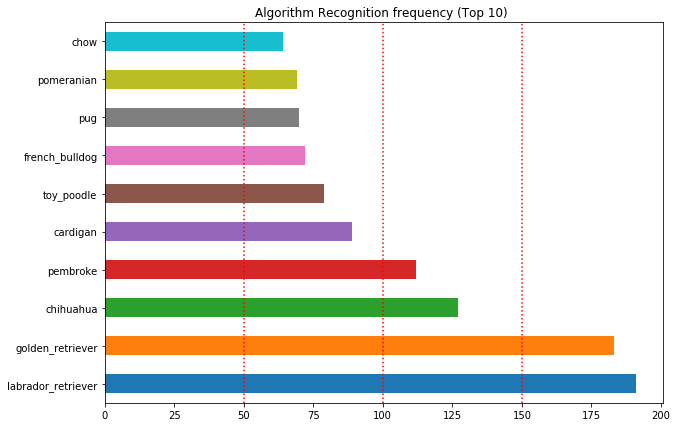

In [150]:
frq_prediction.recognition.value_counts().head(10).plot.barh(title = "Algorithm Recognition frequency (Top 10) ", figsize = (10,7))

plt.axvline(50, color="red", linestyle=":")
plt.axvline(100, color="red", linestyle=":")
plt.axvline(150, color="red", linestyle=":")

`Answer from data analysis)`

**Labrador retriever, Golden retriever, and Chihuahua. These three names are on the top 3 from the result of the analysis**

### [*Analyze and visualize #3*]

`Question from insight)`

**What dog stage do tweets belong to the most?**

In [151]:
stage_chart = multi_stage.drop(columns = 'dmy_sum')
stage_chart.columns = ['', '', '', '', 'Doggo\n\n(Stage 1)','Floofer\n\n(Stage 2)','Pupper\n\n(Stage 3)','Puppo\n\n(Stage 4)']
stage_chart.sum()

Doggo\n\n(Stage 1)      100
Floofer\n\n(Stage 2)    9  
Pupper\n\n(Stage 3)     276
Puppo\n\n(Stage 4)      38 
dtype: int64

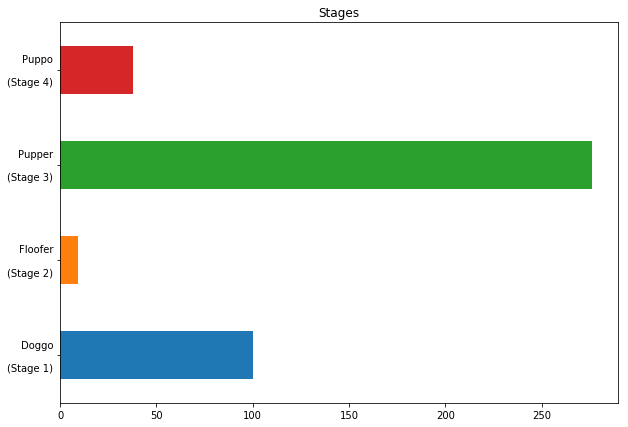

In [152]:
stage_chart.sum().plot.barh(title = "Stages", figsize = (10,7))

<img src="https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png">

`Answer from data analysis)`

**Pupper which is stage 3, is the most common dog stage**

### [*Analyze and visualize #4*]

`Question from insight)`

**Can we find any evidence that there is a correlation between retweet_count vs favorite_count?** 

### retweet_count vs favorite_count

In [153]:
import statsmodels.api as sm

df['intercept'] = 1
lm = sm.OLS(df['favorite_count'], df[['intercept', 'retweet_count']])
result = lm.fit()
result.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     7959.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:24:17   Log-Likelihood:                -13372.
No. Observations:                1373   AIC:                         2.675e+04
Df Residuals:                    1371   BIC:                         2.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1648.9923    132.859     12.412      0.000    1388.364    1909.620
retweet_count     2.9018      0.033     89.211      0.000       2.838       2.966
==============================================================================
Omnibus:                      309.463   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11740.678
Skew:                           0.172   Prob(JB):                         0.00
Kurtosis:                      17.322   Cond. No.                     4.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

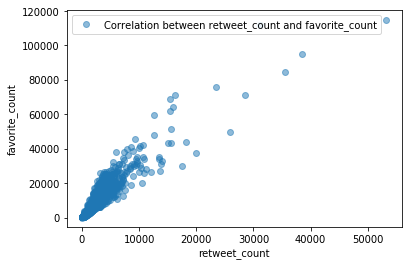

In [154]:
plt.scatter(y = df['favorite_count'], x = df['retweet_count'], alpha = 0.5, label = "Correlation between retweet_count and favorite_count");
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")
plt.legend(loc = 'upper left')
plt.show()

`Answer from data analysis)`

**We used OLS(ordinary least square) model to determine the statistical correlation between the retweet counts and favorite counts. With P-Value of 0.000, we are able to find significant evidence that those two variables are closely correlated.  Scatter plot chart also shows as such.** 

### [*Analyze and visualize #5*]

`Question from insight)`

**Can we find any evidence that there is a correlation between rating_numerator and favorite_count?** 

### rating_numerator vs favorite_count

In [155]:
df.new_rating_numerator.value_counts()

12    330
11    304
10    284
13    171
9     104
8     73 
7     33 
14    21 
6     19 
5     14 
3     11 
4     5  
2     4  
Name: new_rating_numerator, dtype: int64

In [156]:
lm = sm.OLS(df['favorite_count'], df[['intercept', 'new_rating_numerator']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     337.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.59e-67
Time:                        17:24:17   Log-Likelihood:                -14537.
No. Observations:                1373   AIC:                         2.908e+04
Df Residuals:                    1371   BIC:                         2.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept            -1.793e+04   1445.266    -12.408      0.000   -2.08e+04   -1.51e+04
new_rating_numerator  2446.1974    133.193     18.366      0.000    2184.914    2707.481
==============================================================================
Omnibus:                     1211.040   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47218.223
Skew:                           3.974   Prob(JB):                         0.00
Kurtosis:                      30.608   Cond. No.                         61.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

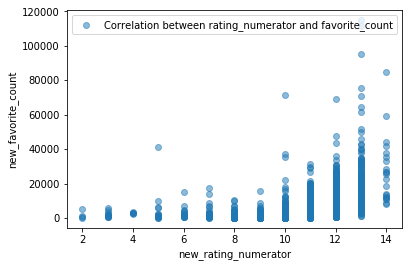

In [157]:
plt.scatter(y = df['favorite_count'], x = df['new_rating_numerator'], alpha = 0.5, label = "Correlation between rating_numerator and favorite_count");
plt.xlabel("new_rating_numerator")
plt.ylabel("new_favorite_count")
plt.legend(loc = 'upper left')
plt.show()

`Answer from data analysis)`

**We used OLS(ordinary least square) model to determine the statistical correlation between the rating_numerator and favorite counts. R-squared value shows its fitness is looser than analysis #4. However, by referring to the P-Value and scatter plot, we are able to find evidence that those two variables are closely correlated.**

End of Line. Thank you so much to read my work.